In [11]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

### Question 3 : How do pickup patterns change throughout the day? 



In [12]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("../Resources/clean.csv")
df.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
1,2015-01-01 00:00:00,0,January,Brooklyn,517.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
2,2015-01-01 00:00:00,0,January,EWR,0.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
3,2015-01-01 00:00:00,0,January,Manhattan,1301.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
4,2015-01-01 00:00:00,0,January,Queens,243.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y


In [13]:
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [14]:
# Get the information for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pickup_dt           26064 non-null  object 
 1   hour                26064 non-null  int64  
 2   month               26064 non-null  object 
 3   borough             26064 non-null  object 
 4   pickups             26064 non-null  float64
 5   Wind speed          26064 non-null  float64
 6   Visibility          26064 non-null  float64
 7   Temperature         26064 non-null  float64
 8   dew point           26064 non-null  float64
 9   Sea level pressure  26064 non-null  float64
 10  Precipitation 01    26064 non-null  float64
 11  Precipitation 06    26064 non-null  float64
 12  Precipitation 24    26064 non-null  float64
 13  Snow depth          26064 non-null  float64
 14  Holiday             26064 non-null  object 
dtypes: float64(10), int64(1), object(4)
memory usage: 3.0

In [15]:
# Create columns for hours and months
df['pickup_dt'] = df['pickup_dt'].astype('datetime64')

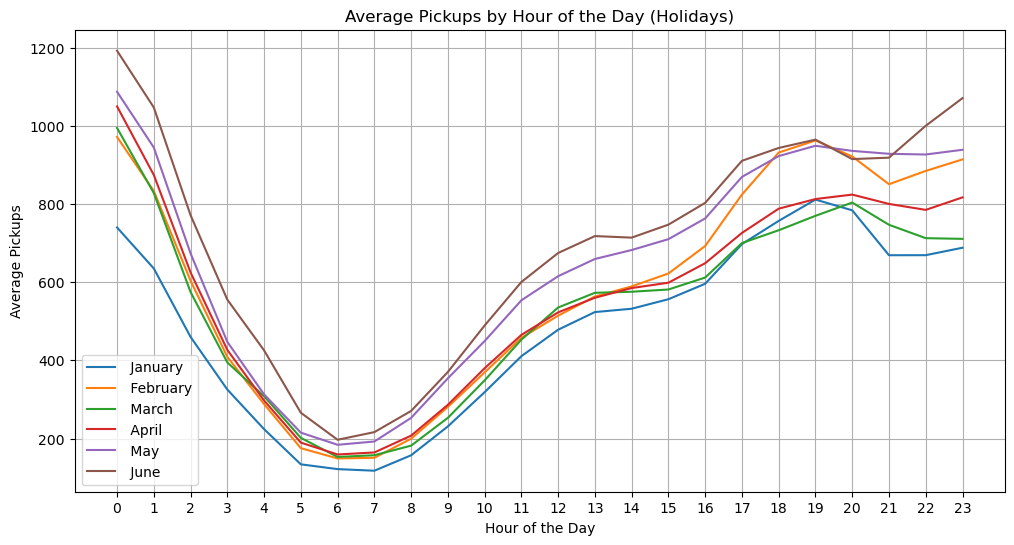

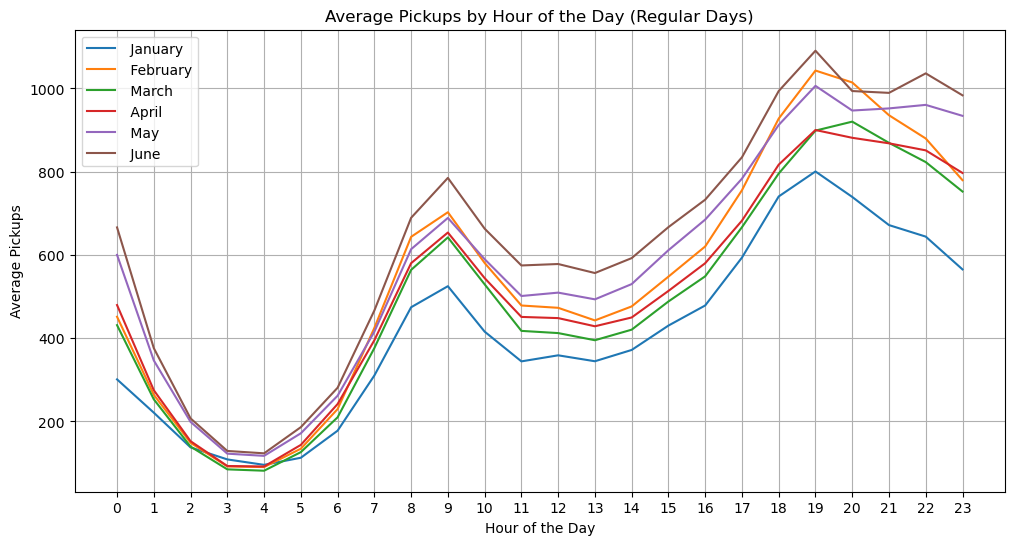

In [16]:
# Separate data into Holiday and regular days
data_holiday = df[df['Holiday'] == 'Y']
data_regular = df[df['Holiday'] == 'N']

# Calculation on borough, month, hour for holidays
borough_data_holiday = data_holiday.groupby(['month', 'hour'])['pickups'].mean().reset_index()

# Calculation on borough, month, hour for regular days
borough_data_regular = data_regular.groupby(['month', 'hour'])['pickups'].mean().reset_index()

# Create lists of months
months = df['month'].unique()

# Plot pickup patterns for each month separately (Holidays)
plt.figure(figsize=(12, 6))
for month in months:
    monthly_data = borough_data_holiday[borough_data_holiday['month'] == month]
    plt.plot(monthly_data['hour'], monthly_data['pickups'], label=f' {month}')

plt.title('Average Pickups by Hour of the Day (Holidays)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.xticks(range(24))
plt.legend(loc="best")

plt.show()

# Plot pickup patterns for each month separately (Regular Days)
plt.figure(figsize=(12, 6))
for month in months:
    monthly_data = borough_data_regular[borough_data_regular['month'] == month]
    plt.plot(monthly_data['hour'], monthly_data['pickups'], label=f' {month}')

plt.title('Average Pickups by Hour of the Day (Regular Days)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.xticks(range(24))
plt.legend(loc="best")

plt.show()


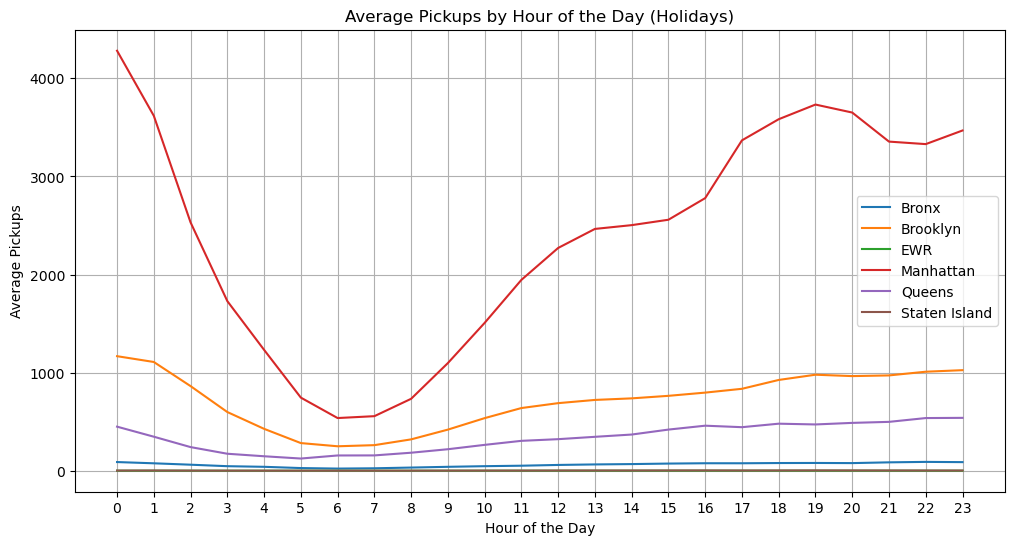

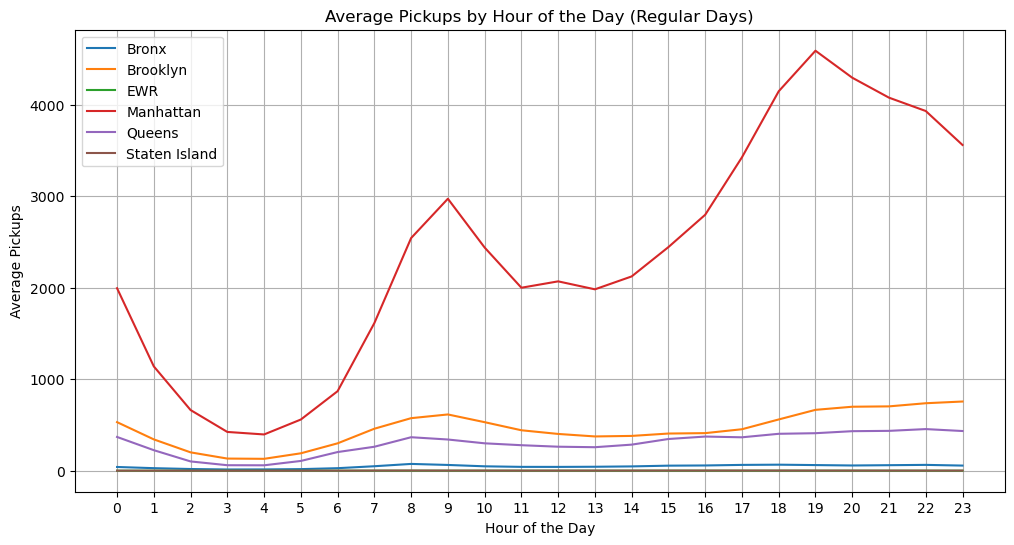

In [17]:
# Separate data into Holiday and regular days
data_holiday = df[df['Holiday'] == 'Y']
data_regular = df[df['Holiday'] == 'N']

# Calculation on borough, hour for holidays
borough_data_holiday = data_holiday.groupby(['borough','hour'])['pickups'].mean().reset_index()

# Calculation on borough, hour for regular days
borough_data_regular = data_regular.groupby(['borough','hour'])['pickups'].mean().reset_index()

# Create lists of months
boroughs = df['borough'].unique()

# Plot pickup patterns for each month separately (Holidays)
plt.figure(figsize=(12, 6))
for borough in boroughs:
    monthly_data = borough_data_holiday[borough_data_holiday['borough'] == borough]
    plt.plot(monthly_data['hour'], monthly_data['pickups'], label=f'{borough}')

plt.title('Average Pickups by Hour of the Day (Holidays)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.xticks(range(24))
plt.legend(loc="best")
plt.savefig('Images/bourough_pickup_pattern_holiday.png')
plt.show()

# Plot pickup patterns for each month separately (Regular Days)
plt.figure(figsize=(12, 6))
for borough in boroughs:
    monthly_data = borough_data_regular[borough_data_regular['borough'] == borough]
    plt.plot(monthly_data['hour'], monthly_data['pickups'], label=f'{borough}')

plt.title('Average Pickups by Hour of the Day (Regular Days)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.xticks(range(24))
plt.legend(loc="best")
plt.savefig('Images/bourough_pickup_pattern_regular.png')
plt.show()


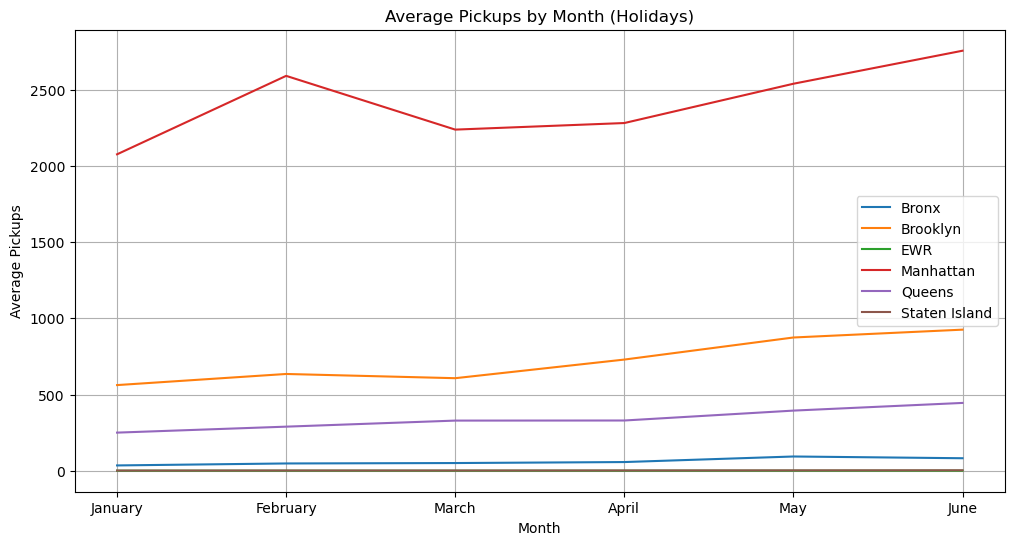

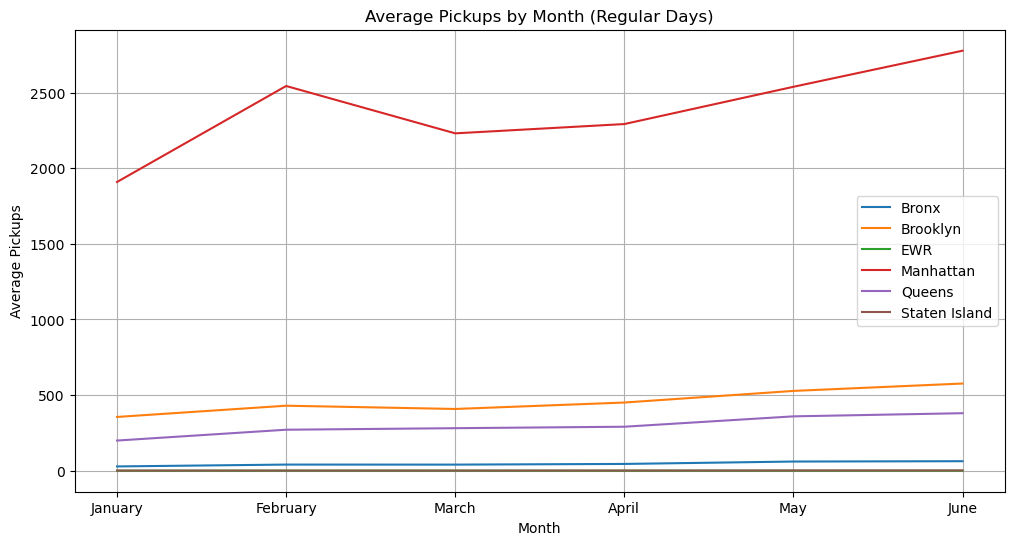

In [19]:
# Separate data into Holiday and regular days
data_holiday = df[df['Holiday'] == 'Y']
data_regular = df[df['Holiday'] == 'N']

# Calculation on borough, month for holidays
borough_data_holiday = data_holiday.groupby(['borough', 'month'])['pickups'].mean().reset_index()

# Calculation on borough, month for regular days
borough_data_regular = data_regular.groupby(['borough', 'month'])['pickups'].mean().reset_index()

# Create a list of months in the desired order
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June']

# Plot pickup patterns for each month separately (Holidays)
plt.figure(figsize=(12, 6))
for borough in boroughs:
    monthly_data = borough_data_holiday[borough_data_holiday['borough'] == borough]
    # Sort the data by month in the desired order
    monthly_data = monthly_data.set_index('month').loc[months_in_order].reset_index()
    plt.plot(monthly_data['month'], monthly_data['pickups'], label=f'{borough}')

plt.title('Average Pickups by Month (Holidays)')
plt.xlabel('Month')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.legend(loc="best")
plt.savefig('Images/borough_month_pickup_pattern_holiday.png')
plt.show()

# Plot pickup patterns for each month separately (Regular Days)
plt.figure(figsize=(12, 6))
for borough in boroughs:
    monthly_data = borough_data_regular[borough_data_regular['borough'] == borough]
    # Sort the data by month in the desired order
    monthly_data = monthly_data.set_index('month').loc[months_in_order].reset_index()
    plt.plot(monthly_data['month'], monthly_data['pickups'], label=f'{borough}')

plt.title('Average Pickups by Month (Regular Days)')
plt.xlabel('Month')
plt.ylabel('Average Pickups')
plt.grid(True)
plt.legend(loc="best")
plt.savefig('Images/borough_month_pickup_pattern_regular.png')
plt.show()


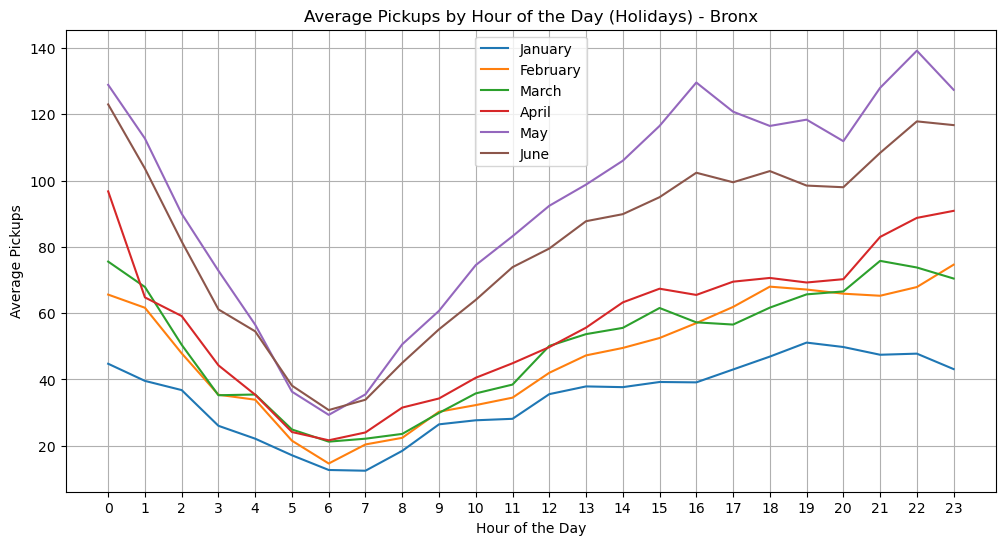

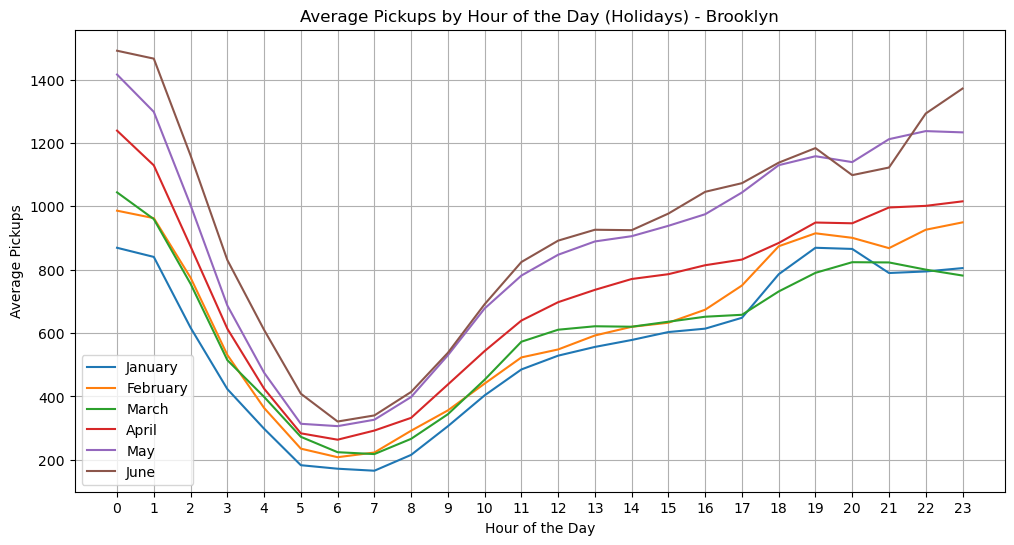

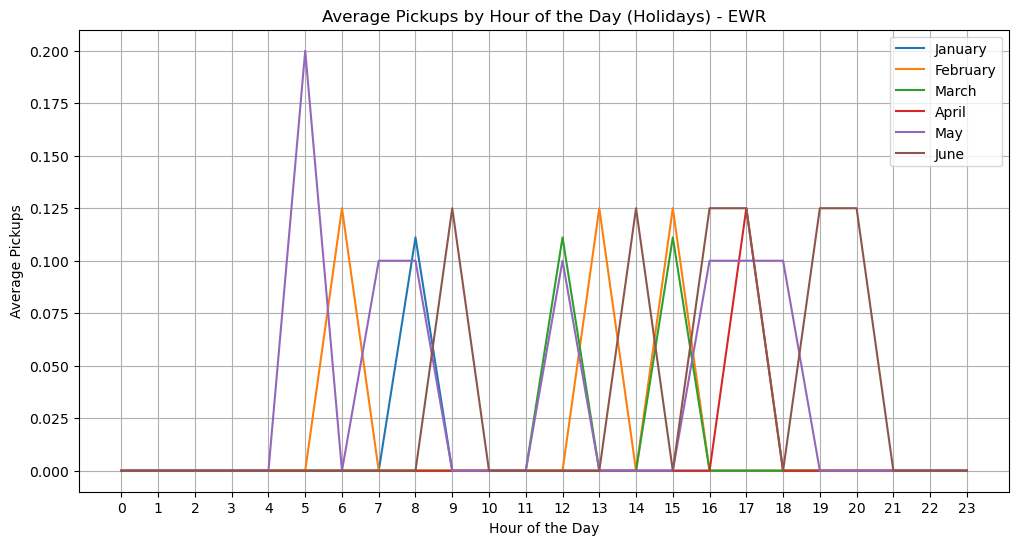

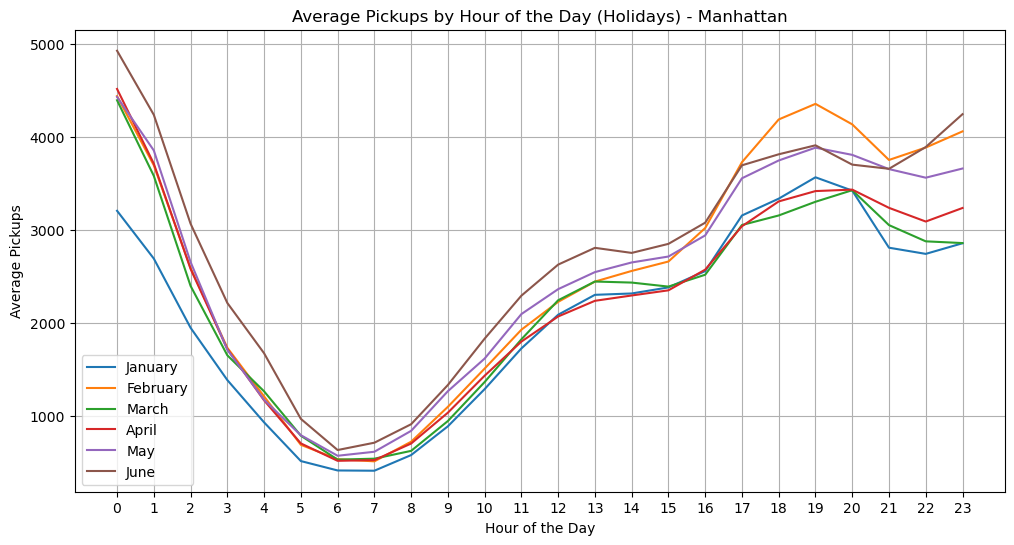

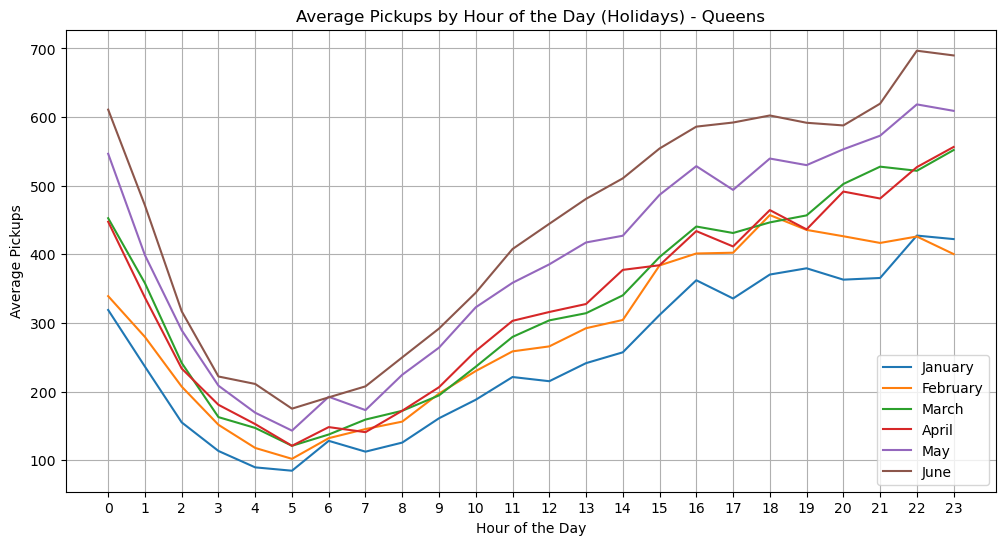

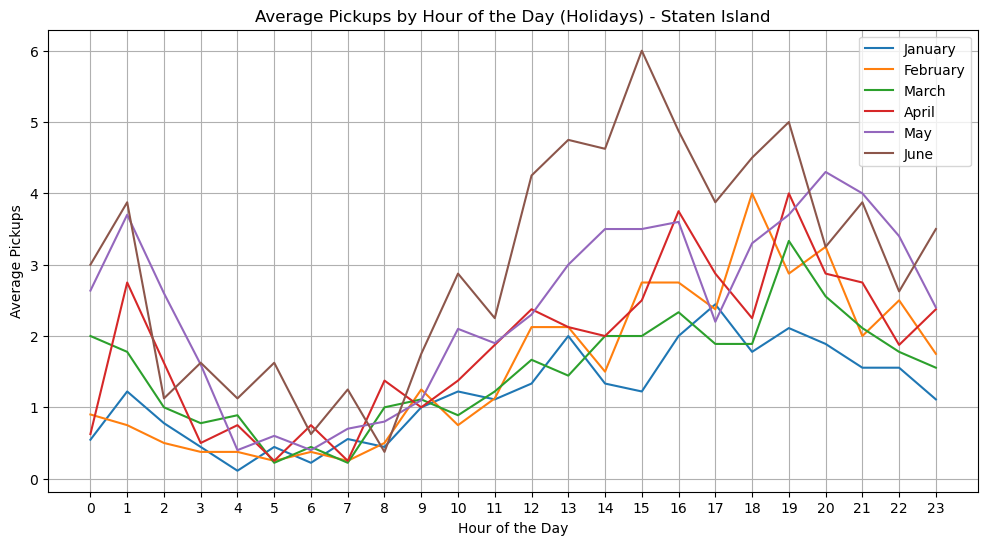

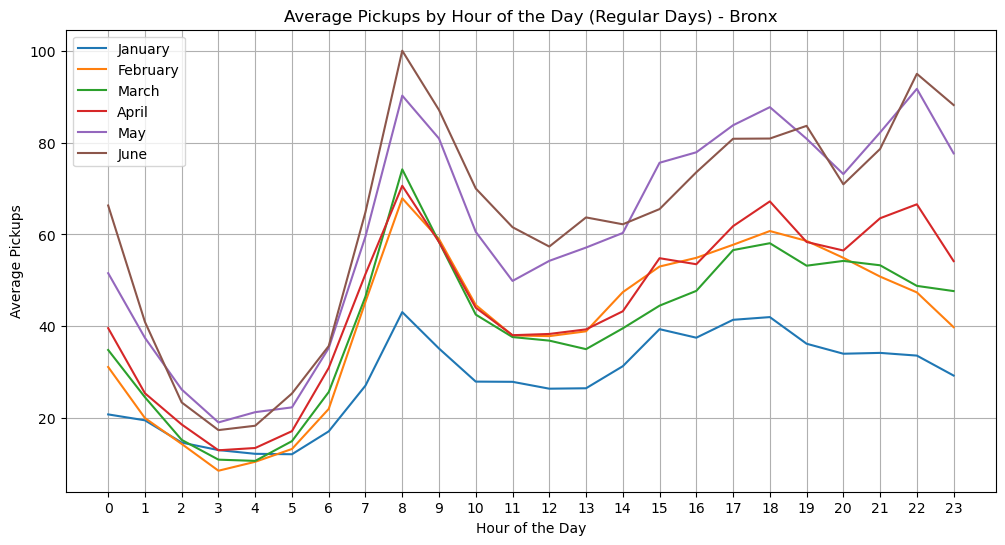

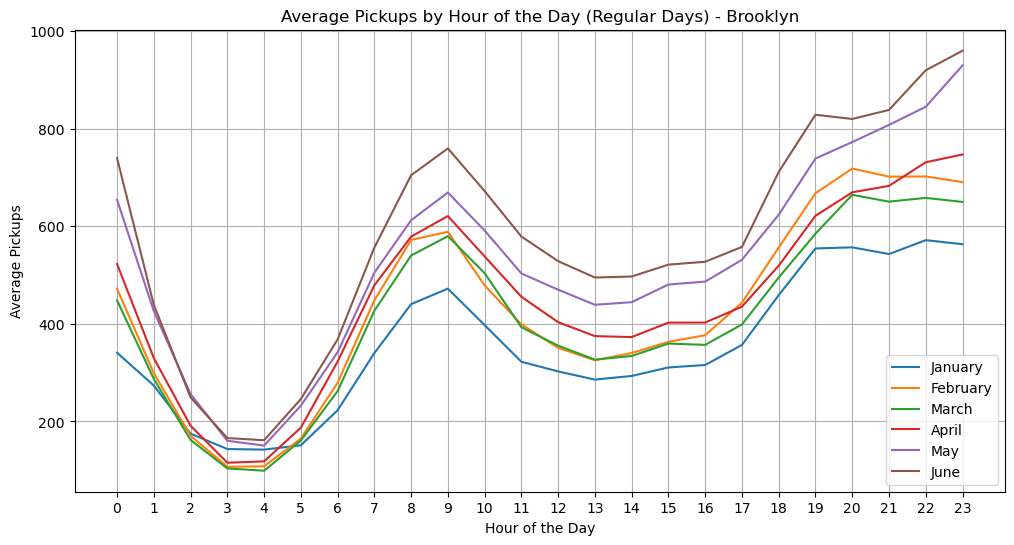

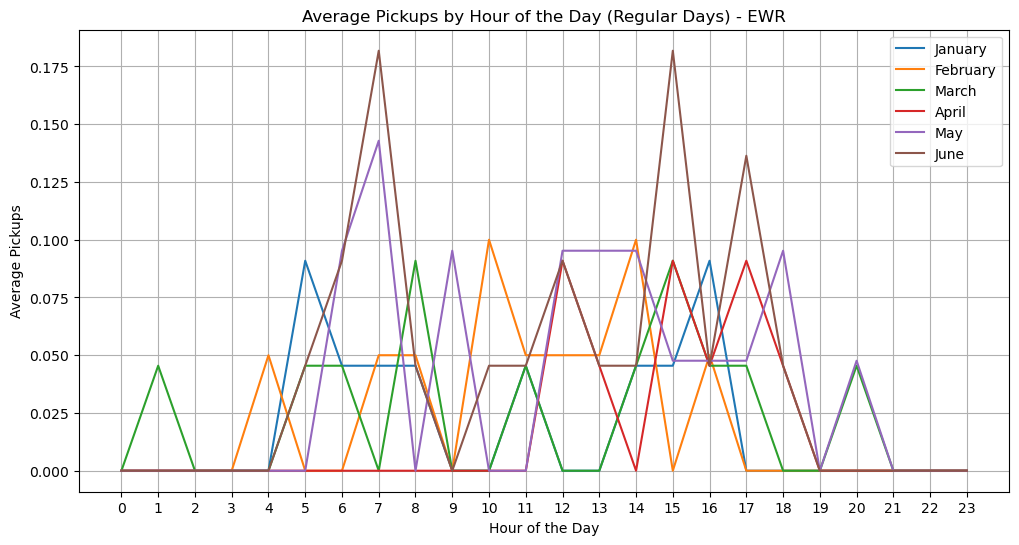

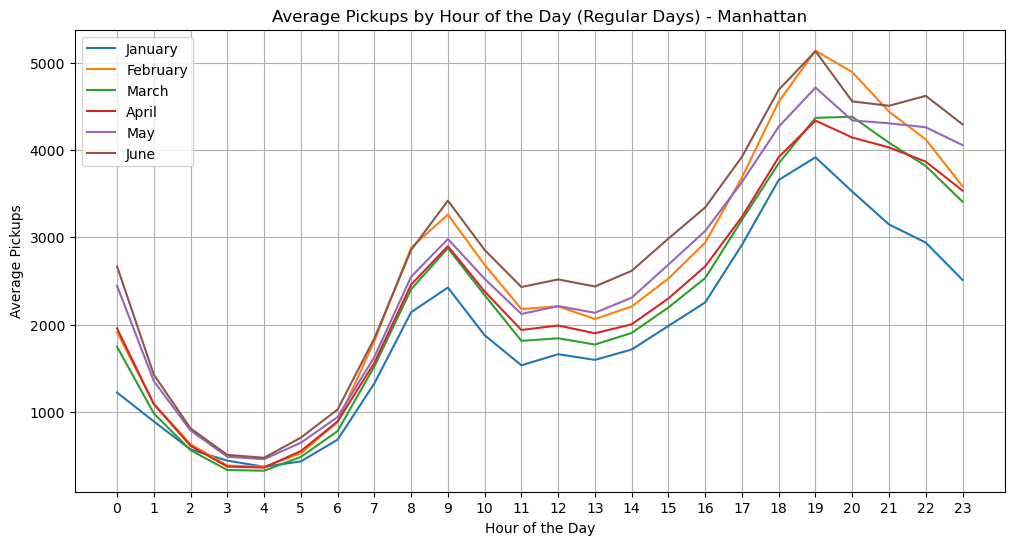

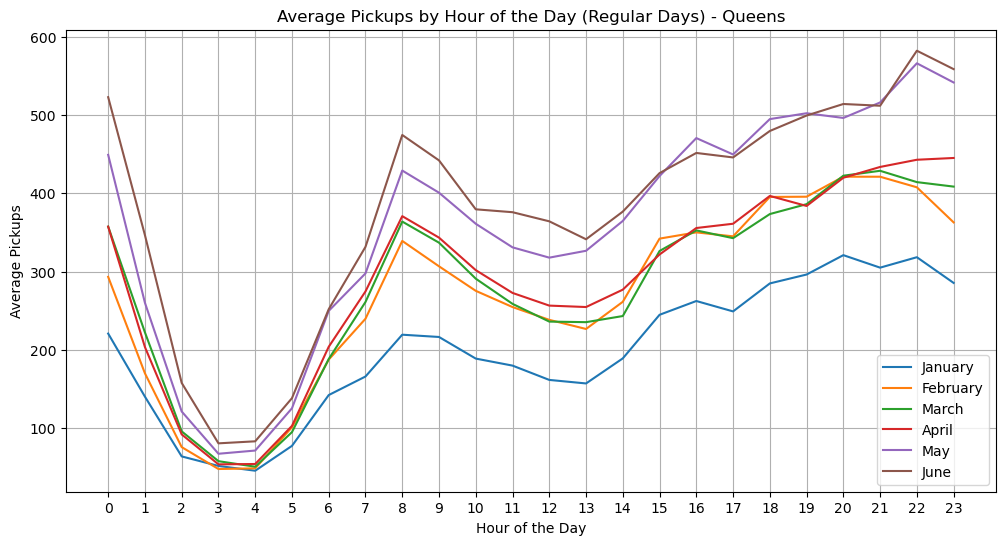

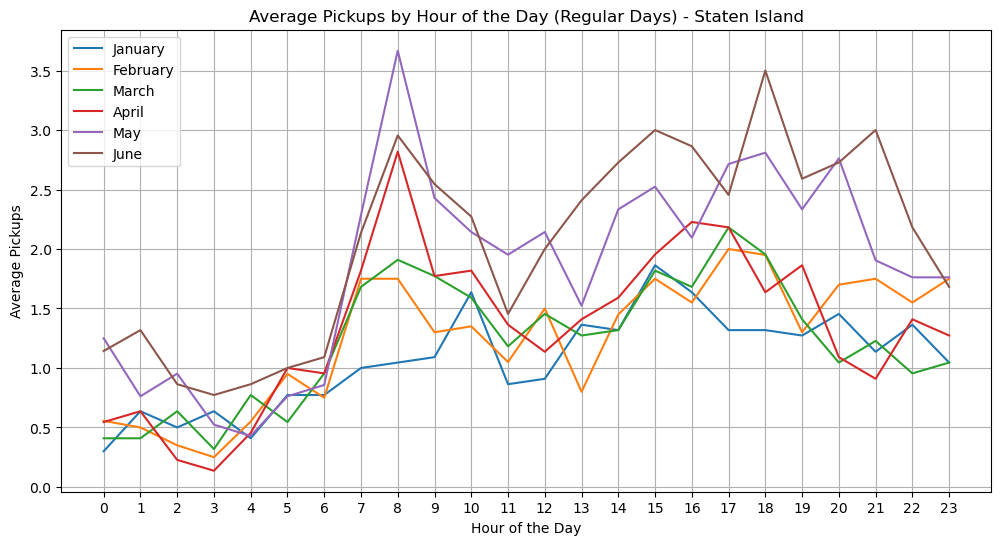

In [ ]:
# Separate data into Holiday and regular days
data_holiday = df[df['Holiday'] == 'Y']
data_regular = df[df['Holiday'] == 'N']

# Calculation on borough, month, hour for holidays
borough_data_holiday = data_holiday.groupby(['borough', 'month', 'hour'])['pickups'].mean()

# Calculation on borough, month, hour for regular days
borough_data_regular = data_regular.groupby(['borough', 'month', 'hour'])['pickups'].mean()

# Create lists of boroughs and months
boroughs = df['borough'].unique()
months = df['month'].unique()

# Plot pickup patterns for each borough and each month separately (Holidays)
for borough in boroughs:
    plt.figure(figsize=(12, 6))
    for month in months:
        each_borough_month_data_holiday = borough_data_holiday[borough].loc[borough_data_holiday[borough].index.get_level_values('month') == month]
        plt.plot(each_borough_month_data_holiday.index.get_level_values('hour'), each_borough_month_data_holiday, label=f'{month}')

    plt.title(f'Average Pickups by Hour of the Day (Holidays) - {borough}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Pickups')
    plt.grid(True)
    plt.xticks(range(24))
    plt.legend(loc="best")
    plt.savefig(f'Images/Holiday-{borough}')
    plt.show()

# Plot pickup patterns for each borough and each month separately (Regular Days)
for borough in boroughs:
    plt.figure(figsize=(12, 6))
    for month in months:
        each_borough_month_data_regular = borough_data_regular[borough].loc[borough_data_regular[borough].index.get_level_values('month') == month]
        plt.plot(each_borough_month_data_regular.index.get_level_values('hour'), each_borough_month_data_regular, label=f'{month}')

    plt.title(f'Average Pickups by Hour of the Day (Regular Days) - {borough}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Pickups')
    plt.grid(True)
    plt.xticks(range(24))
    plt.legend(loc="best")
    plt.savefig(f'Images/regular-{borough}')

    plt.show()


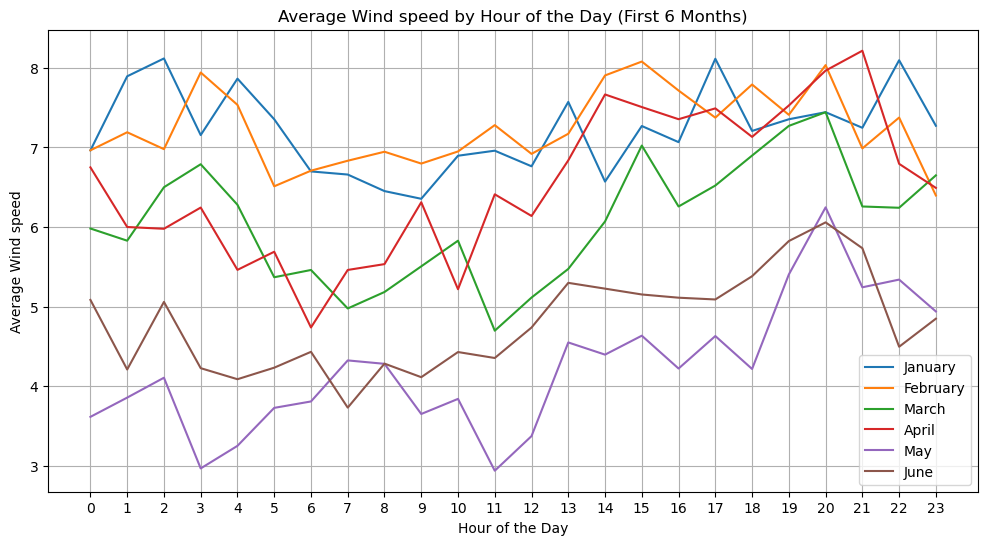

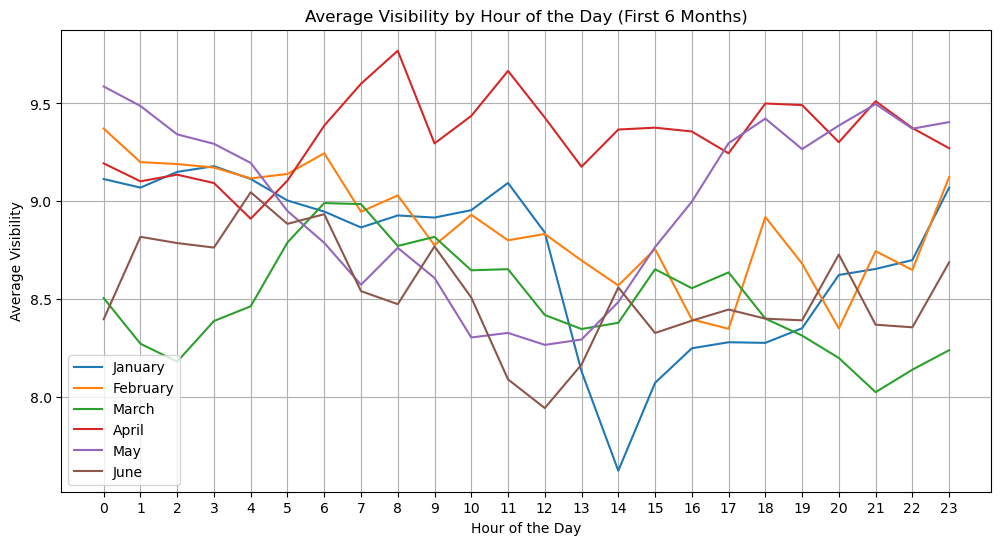

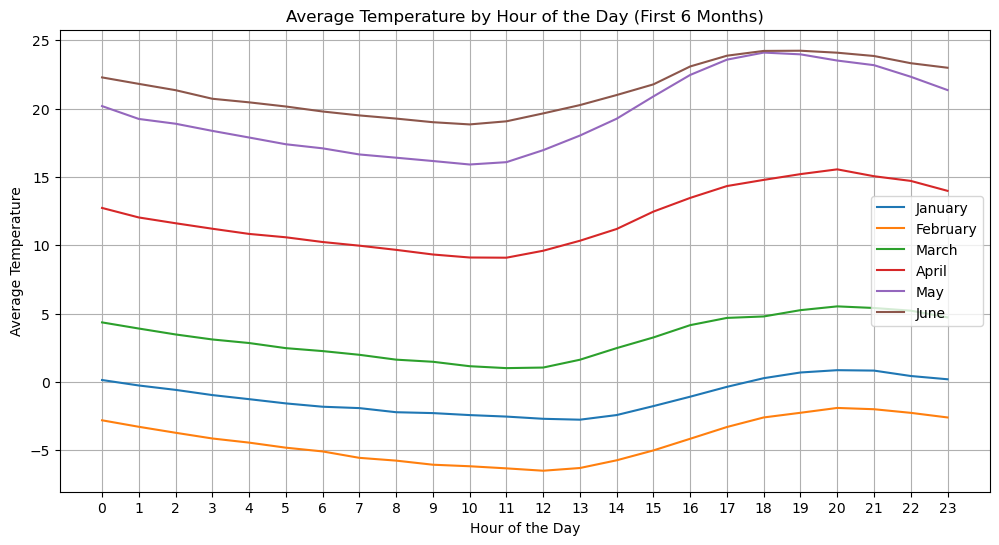

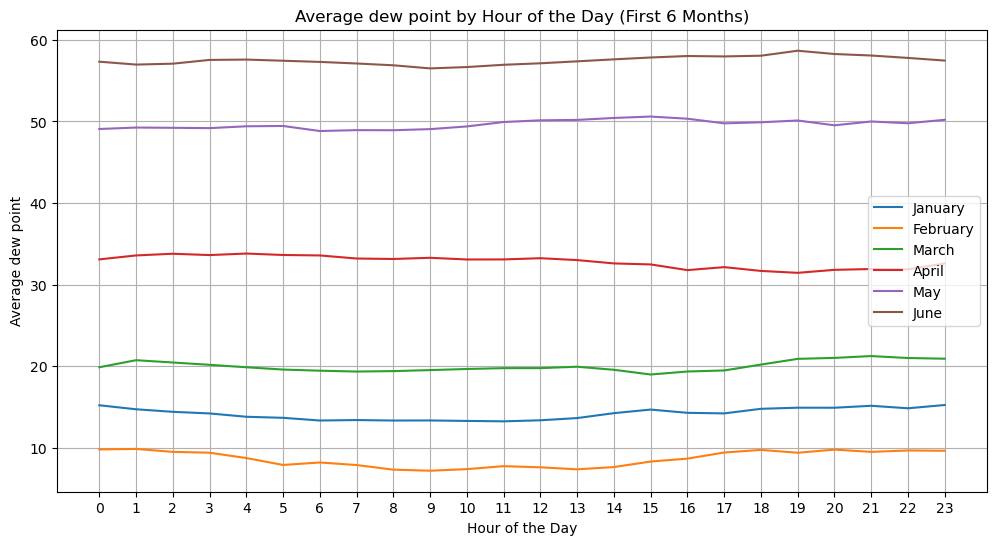

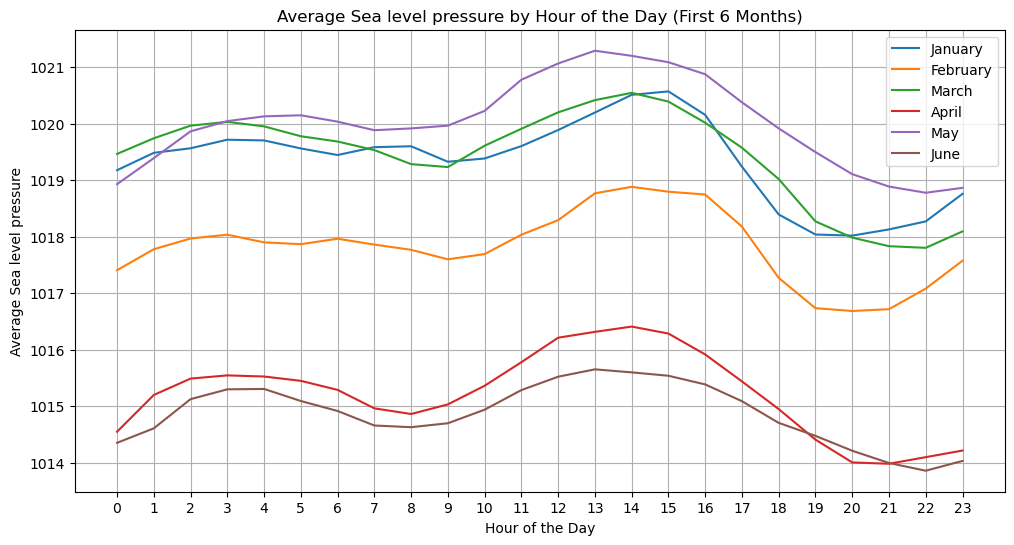

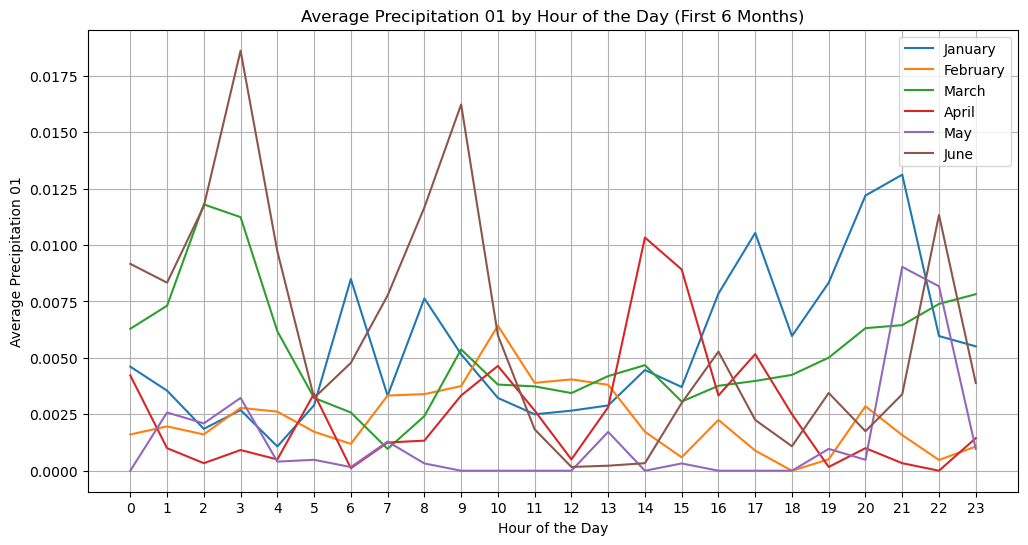

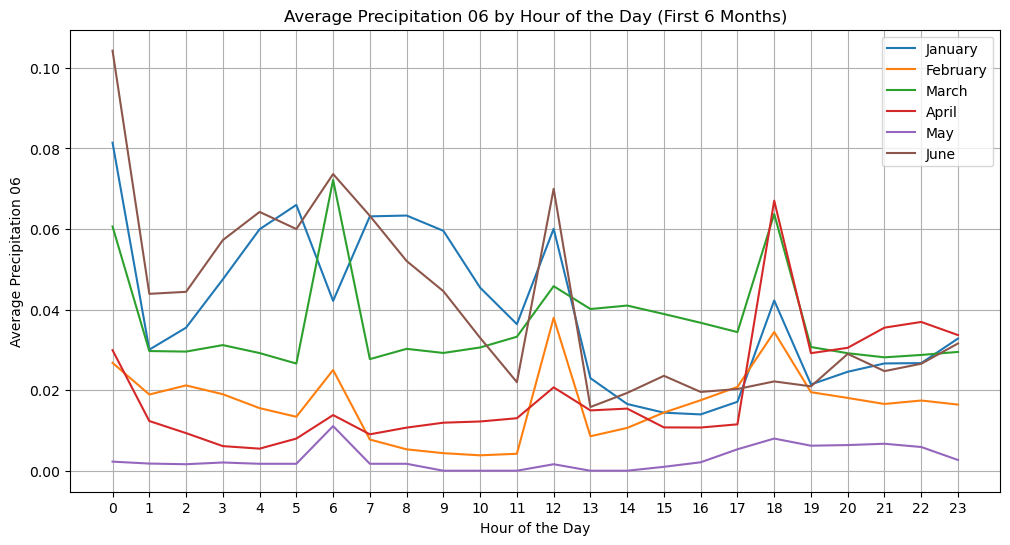

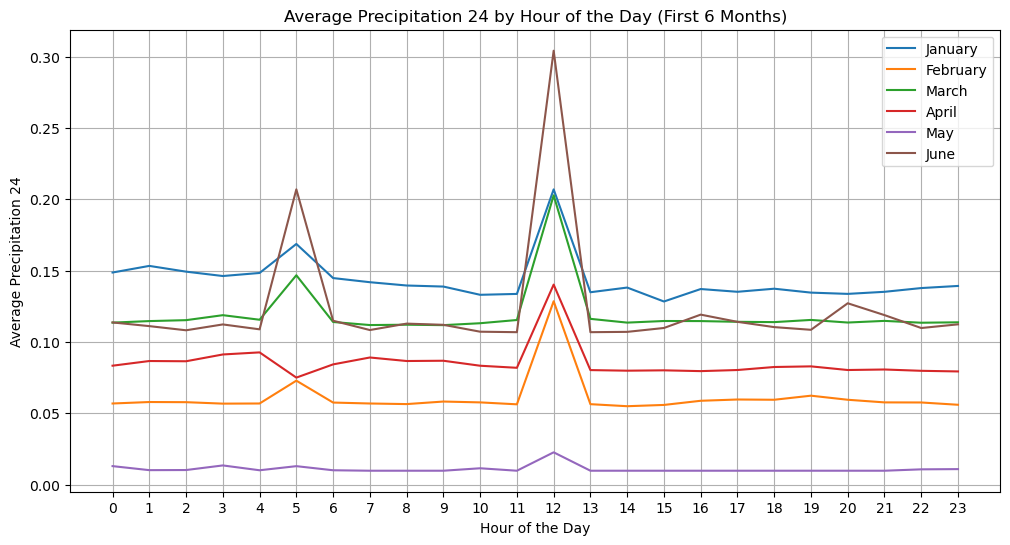

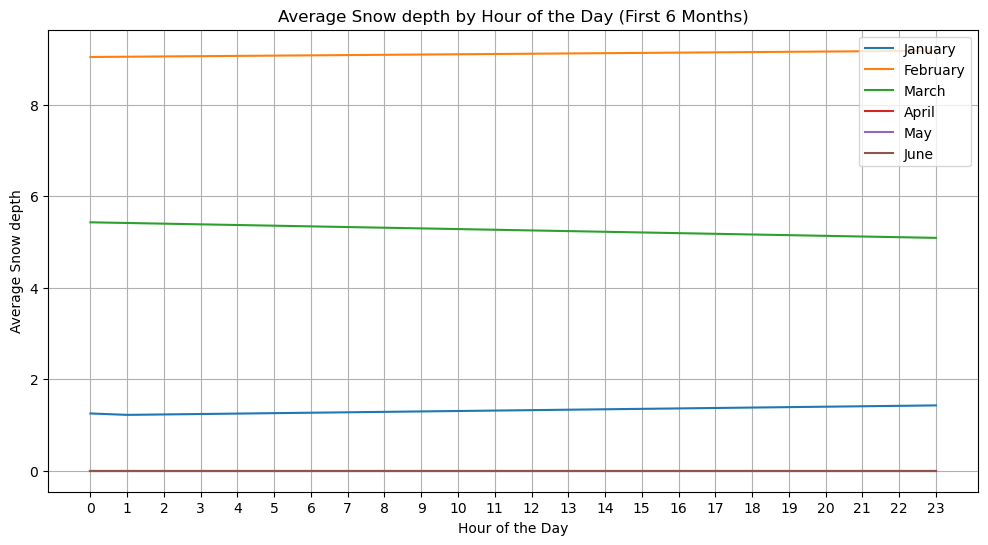

In [ ]:
# Group the data by month and hour of the day and calculate the average Teperature
variable_list = ['Wind speed',
       'Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']

# Plot for each month and for entire boroughs
months = df['month'].unique()
for variable in variable_list:
    variable_monthly_data = df.groupby(['month', 'hour'])[variable].mean()
    plt.figure(figsize=(12, 6))
    for month in months:
        monthly_data = variable_monthly_data[month]  
        plt.plot(monthly_data.index, monthly_data, label=f'{month}')

    plt.title(f'Average {variable} by Hour of the Day (First 6 Months)')
    plt.xlabel('Hour of the Day')
    plt.ylabel(f'Average {variable}')
    plt.grid(True)
    plt.xticks(range(24))
    plt.legend()

    plt.show()